In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import numpy as np
import cv2

In [4]:
def scale(img, nR, nC):
    height = img.shape[0]     # source number of rows 
    width = img.shape[1]  # source number of columns 
    return np.array([[img[int(height * r / nR)][int(width * c / nC)]  for c in range(nC)] for r in range(nR)])

In [5]:
def loadImages(path):
    images = []
    for i in range(1,19):
        img = plt.imread(path+'/image'+str(i)+'.png')
        # Converting the image to gray scale
        R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
        img = 0.2989 * R + 0.5870 * G + 0.1140 * B
        img = scale(img, 800, 1000)
        img = np.float32(img)
        images.append(img)

    return images

In [6]:
images = loadImages('./images')

In [16]:
img1 = cv2.imread('./images/image1.png')
img2 = cv2.imread('./images/image2.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
# img1 = images[0]
# img2 = images[1]

In [17]:
orb = cv2.ORB_create()

In [18]:
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

In [19]:
kp1 = np.float32([keypoints.pt for keypoints in kp1])

In [21]:
des1

array([[163,  37, 166, ...,  76, 223, 198],
       [ 90, 185, 182, ...,  93, 135,  78],
       [126, 185, 181, ...,  86, 134, 126],
       ...,
       [  9,  94,  87, ..., 168,   1,  93],
       [ 13, 247, 255, ..., 178,  65, 113],
       [ 38, 160, 209, ...,   8, 209, 134]], dtype=uint8)

In [22]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING)

In [23]:
matches = bf.match(des1, des2)

In [25]:
matches[0].distance

61.0

In [12]:
matches = sorted(matches, key=lambda x:x.distance)

In [13]:
img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches[:20], None)

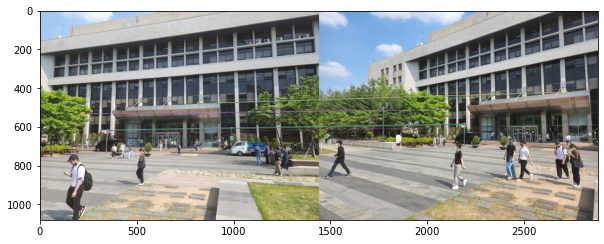

In [14]:
fig = plt.figure(figsize=(10,5))
plt.imshow(img3, cmap='gray')
plt.show()